# 1. Importing Data and basic necessary libraries

In [1]:
!pip install pandas_datareader
!pip install yfinance

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
#from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
import pandas_datareader.data as pdr

### Select the tickers and timeframe

In [46]:
tickers =  ["INFY.NS", "BAJAJHLDNG.NS", "TATAMOTORS.NS", "HINDZINC.NS", "VEDL.NS", "BANKBARODA.NS", "COALINDIA.NS", "TVSMOTOR.NS"]
df = pdr.get_data_yahoo([tickers][0], start='2013-01-01', end="2023-01-01")

data = df.copy()
# we copy the neighbour values to NaN entries
data['Adj Close'] = data['Adj Close'].ffill()
df = df.bfill(axis=1)
data['Adj Close'] = data['Adj Close'].bfill()
df = df.bfill(axis=1)

data = data['Adj Close']
data

[*********************100%%**********************]  8 of 8 completed


,BAJAJHLDNG.NS,BANKBARODA.NS,COALINDIA.NS,HINDZINC.NS,INFY.NS,TATAMOTORS.NS,TVSMOTOR.NS,VEDL.NS
Date,,,,,,,,
2013-01-01,798.869385,151.823410,150.101013,55.257736,220.350555,308.856689,38.184338,75.757957
2013-01-02,808.598328,152.510757,149.579758,55.681404,220.383896,310.075531,37.691341,77.398239
2013-01-03,836.735779,152.854431,150.309540,57.315533,223.122940,310.173035,38.318787,77.970413
2013-01-04,833.869568,151.952286,151.706482,56.427872,224.234833,307.540314,40.559662,76.940483
2013-01-07,827.894836,150.929886,150.205292,57.053265,226.644623,305.443939,42.441975,77.302849
...,...,...,...,...,...,...,...,...
2022-12-26,5699.254395,171.998932,211.764618,272.468689,1444.103027,383.604401,1010.563721,248.103073
2022-12-27,5777.310547,172.484528,212.244263,279.019073,1456.069824,392.925354,1038.923828,257.780853
2022-12-28,5766.082520,176.563553,214.114899,281.318207,1451.552368,390.084229,1077.383911,255.476593


### Checking for NA values

In [47]:
data.isna().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


BAJAJHLDNG.NS    0
BANKBARODA.NS    0
COALINDIA.NS     0
HINDZINC.NS      0
INFY.NS          0
TATAMOTORS.NS    0
TVSMOTOR.NS      0
VEDL.NS          0
dtype: int64

In [48]:
no_datasets = []
for i in tickers:
    no_data_points = len(data[i])
    no_datasets.append((i,no_data_points))
    data_points_df = pd.DataFrame(no_datasets)

data_points_df = pd.DataFrame(no_datasets, columns=["Ticker", "Number of Data Points"])
data_points_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Ticker,Number of Data Points
0,INFY.NS,2468
1,BAJAJHLDNG.NS,2468
2,TATAMOTORS.NS,2468
3,HINDZINC.NS,2468
4,VEDL.NS,2468


### Define the start-end dates for the training and testing data

In [49]:
train_pct = 0.8
samples_train = int(train_pct*len(data))
data_train = data[:samples_train]
data_test = data[samples_train:]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [50]:
data_test.head()

,BAJAJHLDNG.NS,BANKBARODA.NS,COALINDIA.NS,HINDZINC.NS,INFY.NS,TATAMOTORS.NS,TVSMOTOR.NS,VEDL.NS
Date,,,,,,,,
2021-01-05,2913.644775,61.848194,103.731293,187.516937,1193.687866,192.599716,483.500000,99.605064
2021-01-06,2911.678223,61.753914,103.692940,200.801498,1182.893311,194.792877,480.009247,106.265038
2021-01-07,2929.754883,62.366737,104.767456,224.925430,1164.486938,196.138702,490.973267,109.329826
2021-01-08,2932.798828,61.801056,107.223549,221.896240,1210.572144,197.534332,504.788940,107.296471
2021-01-11,2941.274658,60.575401,108.758606,213.319656,1269.711914,219.964432,512.950562,105.587250


### Data Exploration

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


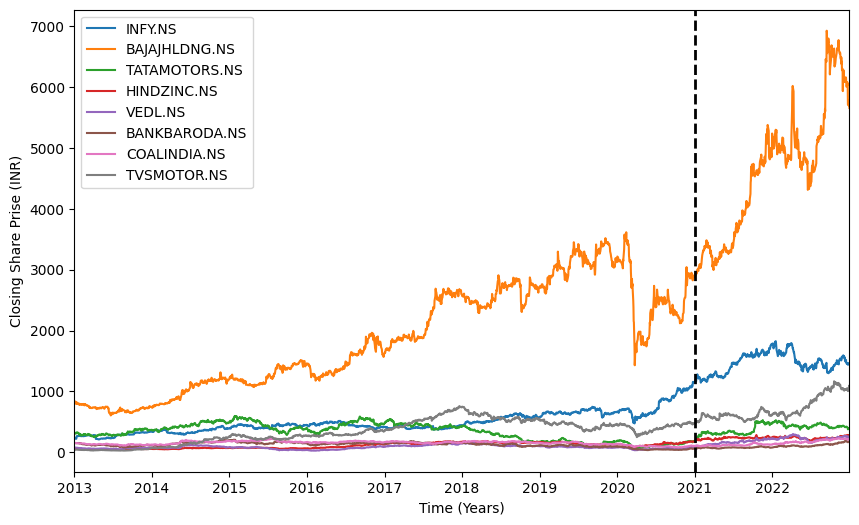

In [51]:
plt.rcParams["figure.figsize"] = (10,6)
for i in tickers:
    plt.plot(data[i], label=i)

# only one line may be specified; full height
plt.axvline(pd.to_datetime('2021-01-01'), color='black', linestyle='--', lw=2)
plt.legend()
plt.margins(x=0)
plt.ylabel("Closing Share Prise (INR)")
plt.xlabel("Time (Years)")
plt.savefig('data0.png',bbox_inches='tight')

In [52]:
# Calculate daily returns
daily_returns = data.pct_change()

# Calculate statistics
mean_returns = daily_returns.mean()*100
std_returns = daily_returns.std()
annualized_mean_returns = mean_returns * 252  # Assuming 252 trading days in a year
annualized_std_returns = std_returns * (252 ** 0.5)

# Create a DataFrame to present the statistics
statistics_df = pd.DataFrame({
    'Mean Daily Returns %': mean_returns,
    'Std Deviation of Daily Returns': std_returns,
    'Mean Annualized Returns %': annualized_mean_returns,
    'Std Deviation of Annualized Returns': annualized_std_returns
})

statistics_df

,Mean Daily Returns %,Std Deviation of Daily Returns,Mean Annualized Returns %,Std Deviation of Annualized Returns
BAJAJHLDNG.NS,0.097268,0.018863,24.511574,0.299433
BANKBARODA.NS,0.045169,0.027818,11.382501,0.441594
COALINDIA.NS,0.032355,0.018817,8.153545,0.298713
HINDZINC.NS,0.087234,0.020853,21.982934,0.331032
INFY.NS,0.092201,0.017704,23.234709,0.281038
TATAMOTORS.NS,0.044952,0.026868,11.327869,0.426522
TVSMOTOR.NS,0.162051,0.023107,40.836801,0.366809
VEDL.NS,0.091162,0.028711,22.972878,0.455769


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Figure size 1200x800 with 0 Axes>

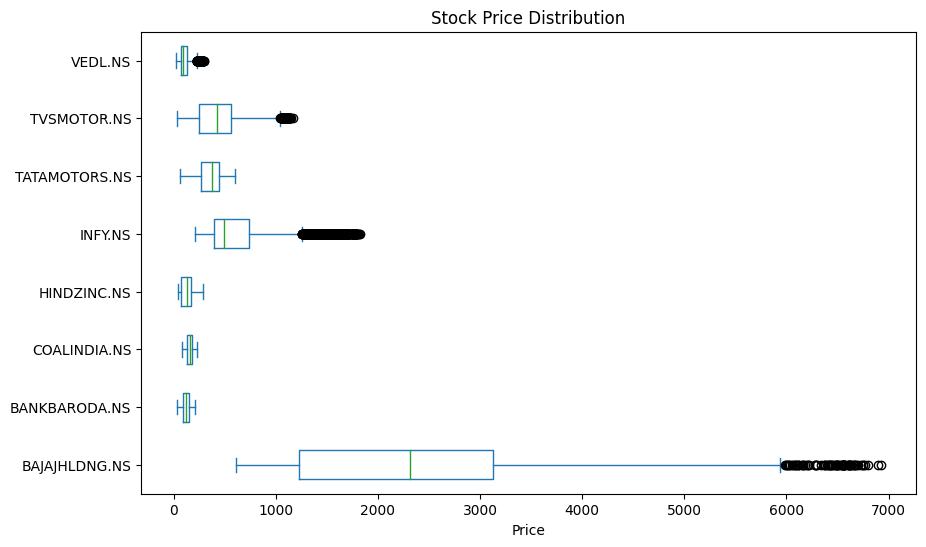

In [53]:
# Visualize the distribution of prices
plt.figure(figsize=(12, 8))
data.plot(kind='box', vert=False)
plt.title('Stock Price Distribution')
plt.xlabel('Price')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


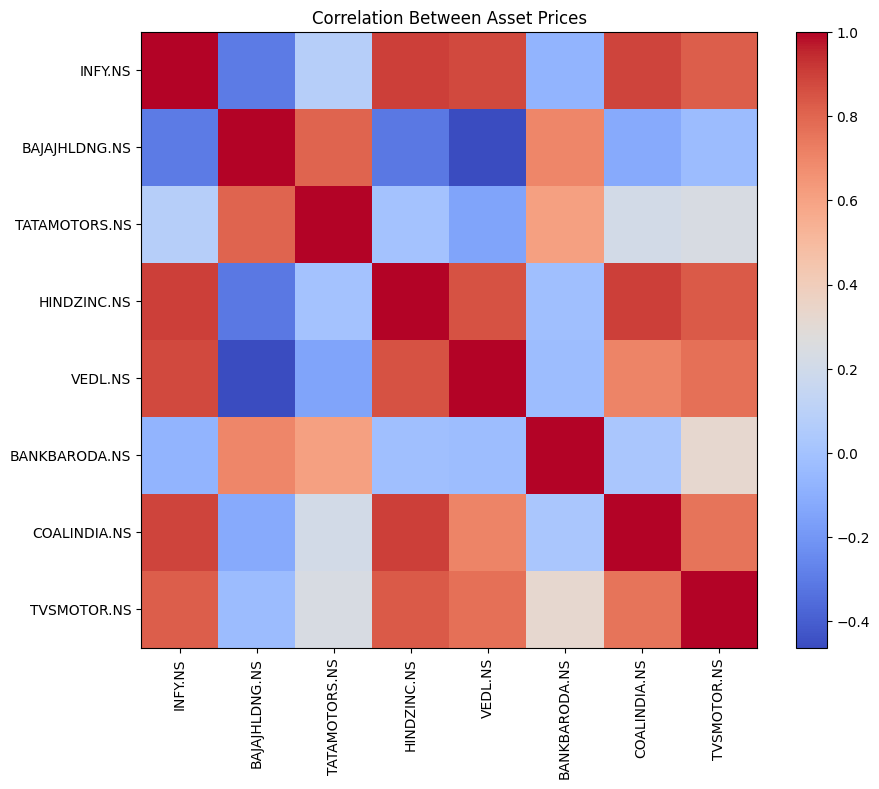

In [54]:
# Visualize the correlation between stock prices
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
tick_range = range(len(tickers))
plt.xticks(tick_range, tickers, rotation=90)
plt.yticks(tick_range, tickers)
plt.title('Correlation Between Asset Prices')
plt.show()

# Deep Reinfrocement Learning Frameworks

In [55]:
!pip install deep-rl
!pip install stable-baselines3

In [56]:
import numpy as np
import random
from deepRL import StockEnvTrade, train, DRL_prediction
from stable_baselines3.common.vec_env import DummyVecEnv

In [57]:
rebalance_period = 1
re_df = data.iloc[::rebalance_period, :]
train_re_df = data_train.iloc[::rebalance_period, :]
test_re_df = data_test.iloc[::rebalance_period, :]

In [58]:
timesteps = 1000
runs = 5
policy = "MlpPolicy"
length = test_re_df.shape[0]
stocks = test_re_df.shape[1]

In [59]:
!pip install shimmy

### PPO

In [60]:
algo = "PPO"
Cumulative_returns_daily_drl_ppo = np.zeros([runs, length])
portfolio_weights_ppo = np.zeros([runs, length, stocks])

i=0
cont=0
while (i<runs):

    train_env = DummyVecEnv([lambda: StockEnvTrade(df = train_re_df)])
    model = train(algo, policy, train_env, timesteps, seed=cont, save=False)

    test_env = DummyVecEnv([lambda: StockEnvTrade(df = test_re_df)])
    test_obs = test_env.reset()

    portfolio_weights_ppo[i] = np.array(DRL_prediction(model, test_re_df, test_env, test_obs))

    check = np.sum(portfolio_weights_ppo[i])
    cont = cont +1
    if check != length:
        continue

    return_stocks = test_re_df.pct_change()
    return_stocks_ppo = np.sum(return_stocks.multiply(portfolio_weights_ppo[i]),axis=1)
    Cumulative_returns_daily_drl_ppo[i] = (1+return_stocks_ppo).cumprod()
    i = i+1

/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


Training time:  0.08645986318588257  minutes
Training time:  0.08649786313374837  minutes
Training time:  0.16088829040527344  minutes
Training time:  0.12140790224075318  minutes
Training time:  0.15134633779525758  minutes


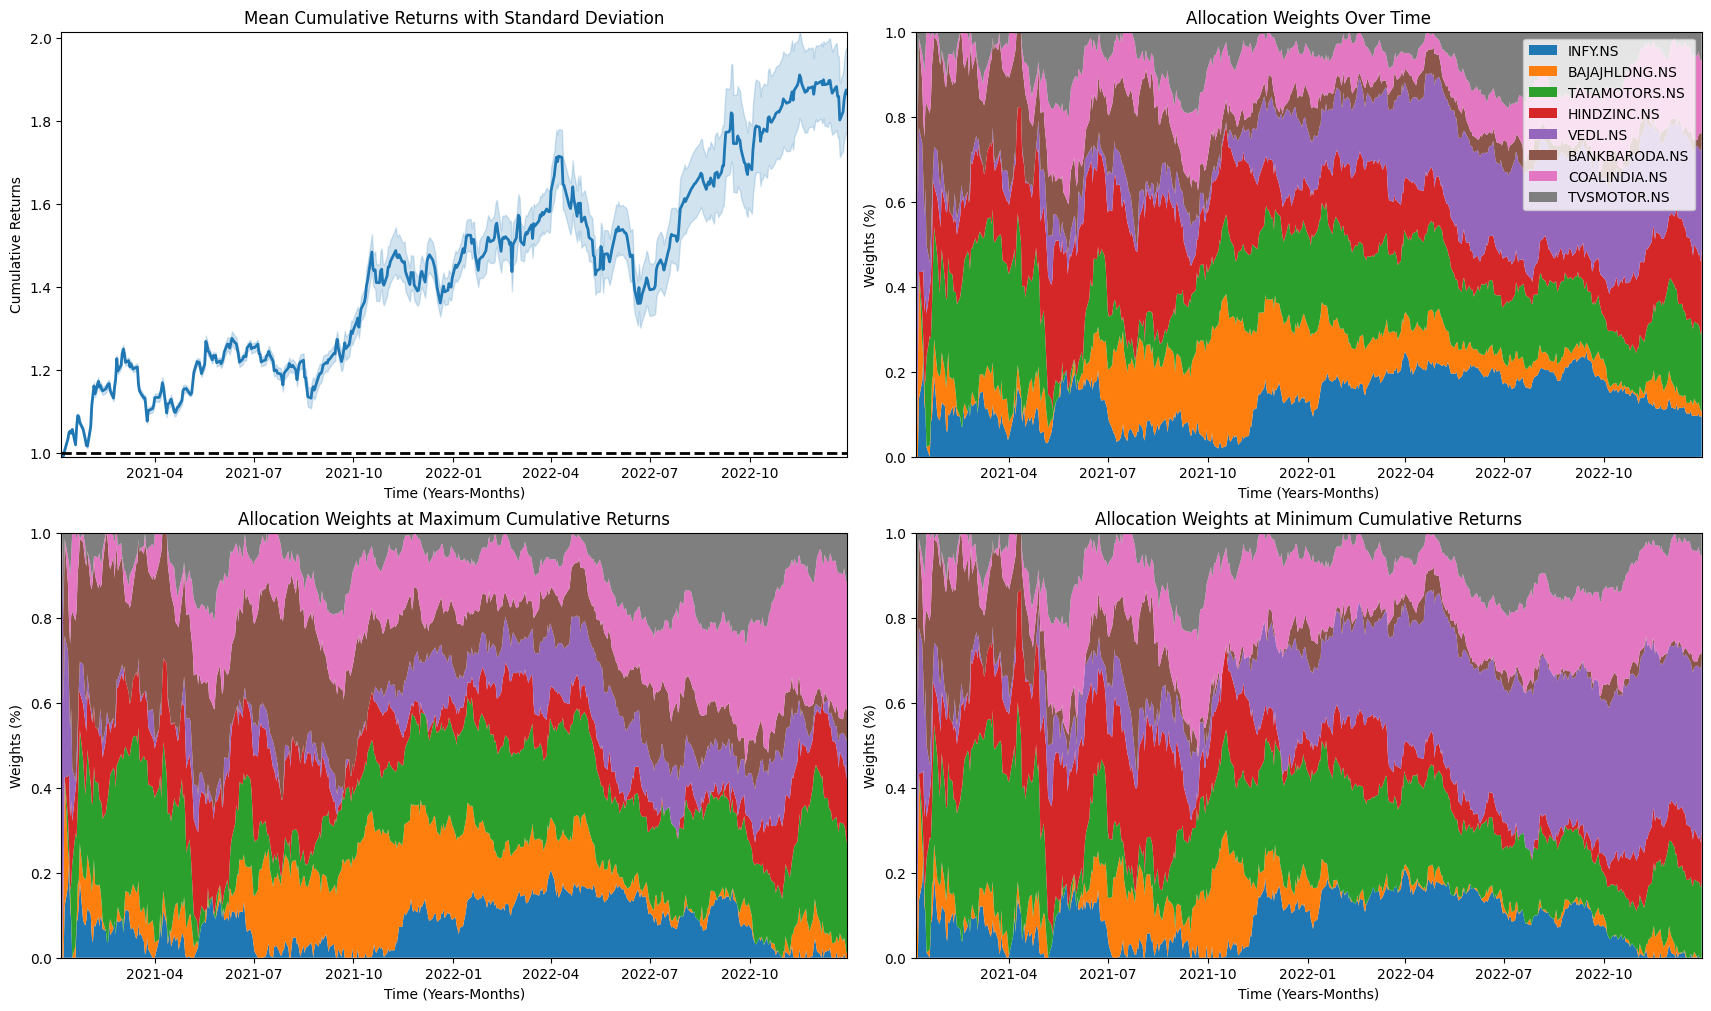

In [61]:
fig, axs = plt.subplots(2, 2, figsize=(17,10),constrained_layout=True)

# Upper Left Plot - Mean Cumulative Returns with Standard Deviation
ppo_mean = np.mean(np.array(Cumulative_returns_daily_drl_ppo),axis=0)
ppo_std = np.std(np.array(Cumulative_returns_daily_drl_ppo),axis=0)

axs[0,0].plot(test_re_df.index, ppo_mean, color='tab:blue', linewidth =2.0)
axs[0,0].fill_between(test_re_df.index, ppo_mean - ppo_std, ppo_mean + ppo_std, alpha=0.2, color='tab:blue')
axs[0,0].margins(x=0)
axs[0,0].margins(y=0)
axs[0,0].axhline(1, color='black', linestyle='--', lw=2)
axs[0,0].set_ylabel("Cumulative Returns")
axs[0,0].set_xlabel("Time (Years-Months)")
axs[0,0].set_title("Mean Cumulative Returns with Standard Deviation")

# Upper Right Plot - Allocation Weights Over Time
portfolio_weights_ppo_ = np.mean(np.array(portfolio_weights_ppo),axis=0)
df = pd.DataFrame (portfolio_weights_ppo_, index = test_re_df.index, columns = tickers)
axs[0,1].stackplot(test_re_df.index, df['INFY.NS'], df['BAJAJHLDNG.NS'], df['TATAMOTORS.NS'], df['HINDZINC.NS'], df['VEDL.NS'], df['BANKBARODA.NS'], df['COALINDIA.NS'], df['TVSMOTOR.NS'], labels=tickers)
axs[0,1].legend(loc='upper right')
axs[0,1].margins(x=0)
axs[0,1].margins(y=0)
axs[0,1].set_ylabel("Weights (%)")
axs[0,1].set_xlabel("Time (Years-Months)")
axs[0,1].set_title("Allocation Weights Over Time")

# Lower Left Plot - Allocation Weights at Maximum Cumulative Returns
portfolio_weights_ppo_ = portfolio_weights_ppo[np.argmax(Cumulative_returns_daily_drl_ppo[:,-1])]
df = pd.DataFrame (portfolio_weights_ppo_, index = test_re_df.index, columns = tickers)
axs[1,0].stackplot(test_re_df.index, df['INFY.NS'], df['BAJAJHLDNG.NS'], df['TATAMOTORS.NS'], df['HINDZINC.NS'], df['VEDL.NS'], df['BANKBARODA.NS'], df['COALINDIA.NS'], df['TVSMOTOR.NS'], labels=tickers)
axs[1,0].margins(x=0)
axs[1,0].margins(y=0)
axs[1,0].set_ylabel("Weights (%)")
axs[1,0].set_xlabel("Time (Years-Months)")
axs[1,0].set_title("Allocation Weights at Maximum Cumulative Returns")

# Lower Right Plot - Allocation Weights at Minimum Cumulative Returns
portfolio_weights_ppo_ = portfolio_weights_ppo[np.argmin(Cumulative_returns_daily_drl_ppo[:,-1])]
df = pd.DataFrame (portfolio_weights_ppo_, index = test_re_df.index, columns = tickers)
axs[1,1].stackplot(test_re_df.index, df['INFY.NS'], df['BAJAJHLDNG.NS'], df['TATAMOTORS.NS'], df['HINDZINC.NS'], df['VEDL.NS'], df['BANKBARODA.NS'], df['COALINDIA.NS'], df['TVSMOTOR.NS'], labels=tickers)
axs[1,1].margins(x=0)
axs[1,1].margins(y=0)
axs[1,1].set_ylabel("Weights (%)")
axs[1,1].set_xlabel("Time (Years-Months)")
axs[1,1].set_title("Allocation Weights at Minimum Cumulative Returns")

plt.savefig(algo+'.png',bbox_inches='tight')

### DDPG

In [62]:
algo = "DDPG"
Cumulative_returns_daily_drl_ddpg = np.zeros([runs, length])
portfolio_weights_ddpg = np.zeros([runs, length, stocks])

i=0
cont=0
while (i<runs):

    train_env = DummyVecEnv([lambda: StockEnvTrade(df = train_re_df)])
    model = train(algo, policy, train_env, timesteps, seed=cont, save=False)

    test_env = DummyVecEnv([lambda: StockEnvTrade(df = test_re_df)])
    test_obs = test_env.reset()

    portfolio_weights_ddpg[i] = np.array(DRL_prediction(model, test_re_df, test_env, test_obs))

    check = np.sum(portfolio_weights_ddpg[i])
    cont = cont +1
    if check != length:
        continue

    return_stocks = test_re_df.pct_change()
    return_stocks_ddpg = np.sum(return_stocks.multiply(portfolio_weights_ddpg[i]),axis=1)
    Cumulative_returns_daily_drl_ddpg[i] = (1+return_stocks_ddpg).cumprod()
    i = i+1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


Training time:  0.9229938546816508  minutes
Training time:  0.5543533762296041  minutes
Training time:  0.5637776374816894  minutes
Training time:  0.5513805667559306  minutes
Training time:  0.5815190076828003  minutes
Training time:  0.571566641330719  minutes
Training time:  0.5523410558700561  minutes
Training time:  0.6879157821337382  minutes


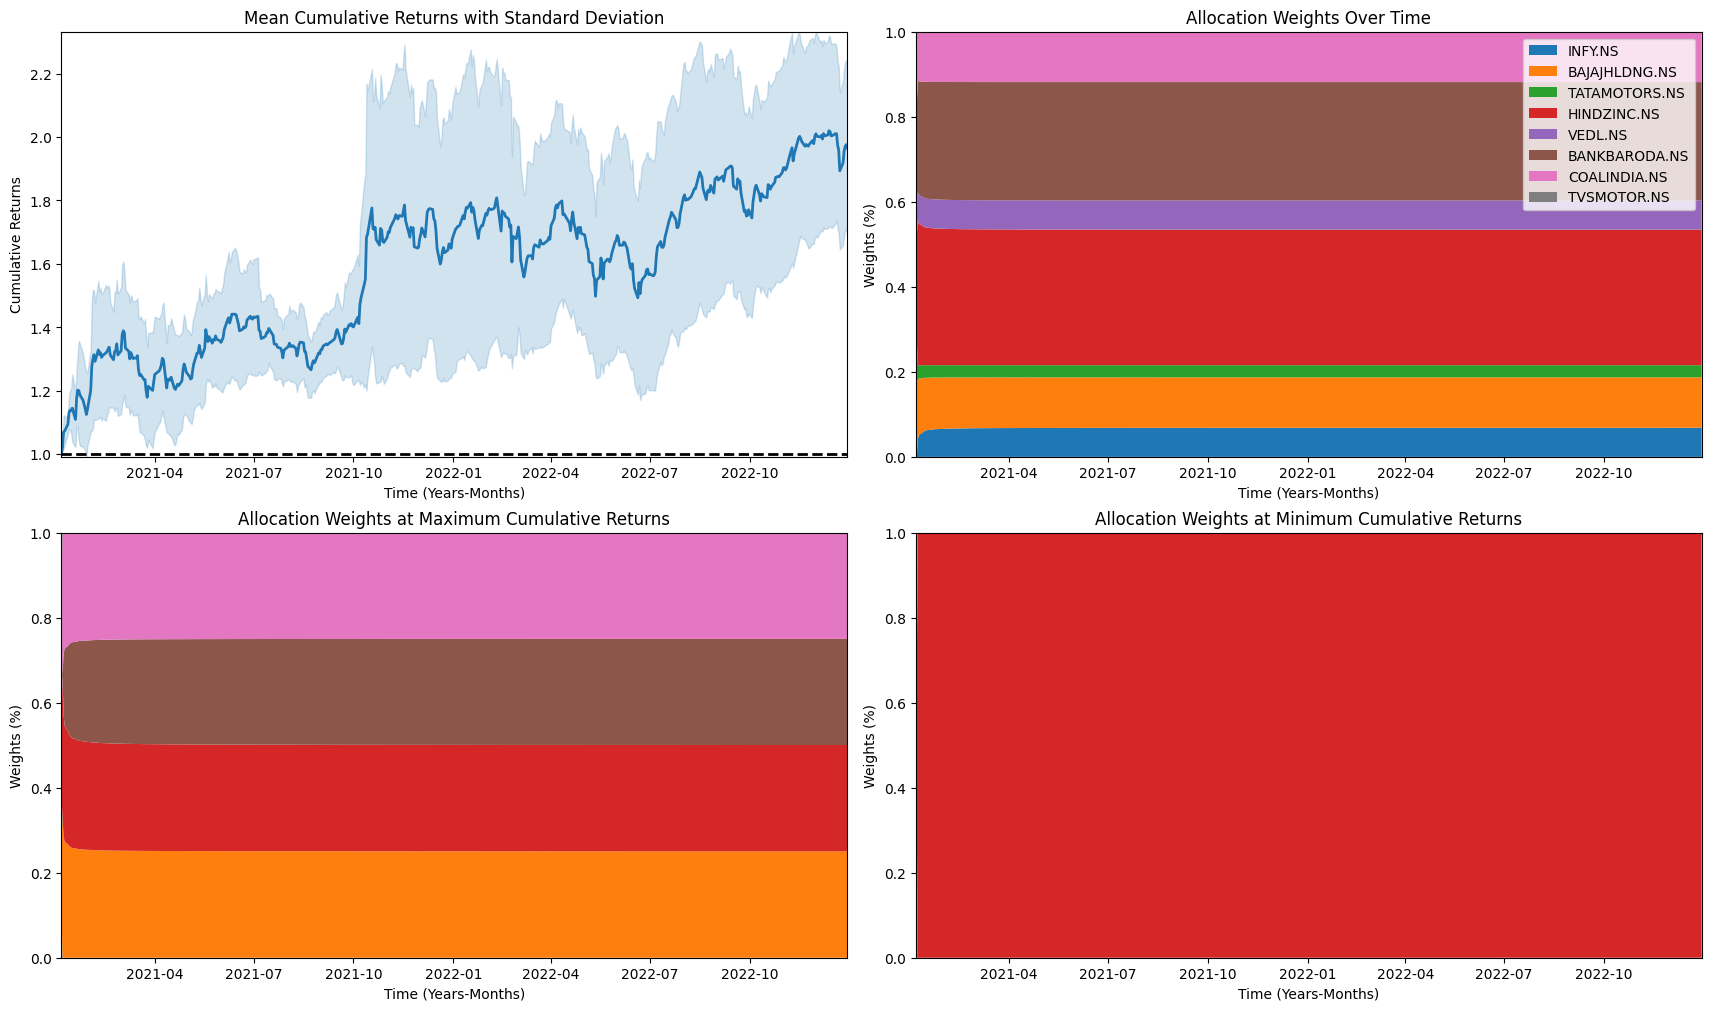

In [63]:
fig, axs = plt.subplots(2, 2, figsize=(17,10),constrained_layout=True)

ddpg_mean = np.mean(np.array(Cumulative_returns_daily_drl_ddpg),axis=0)
ddpg_std = np.std(np.array(Cumulative_returns_daily_drl_ddpg),axis=0)

axs[0,0].plot(test_re_df.index, ddpg_mean, color='tab:blue', linewidth =2.0)
axs[0,0].fill_between(test_re_df.index, ddpg_mean - ddpg_std, ddpg_mean + ddpg_std, alpha=0.2, color='tab:blue')
axs[0,0].margins(x=0)
axs[0,0].margins(y=0)
axs[0,0].axhline(1, color='black', linestyle='--', lw=2)
axs[0,0].set_ylabel("Cumulative Returns")
axs[0,0].set_xlabel("Time (Years-Months)")
axs[0,0].set_title("Mean Cumulative Returns with Standard Deviation")

portfolio_weights_ddgpc_ = np.mean(np.array(portfolio_weights_ddpg),axis=0)
df = pd.DataFrame (portfolio_weights_ddgpc_, index = test_re_df.index, columns = tickers)
axs[0,1].stackplot(test_re_df.index, df['INFY.NS'], df['BAJAJHLDNG.NS'], df['TATAMOTORS.NS'], df['HINDZINC.NS'], df['VEDL.NS'], df['BANKBARODA.NS'], df['COALINDIA.NS'], df['TVSMOTOR.NS'], labels=tickers)
axs[0,1].legend(loc='upper right')
axs[0,1].margins(x=0)
axs[0,1].margins(y=0)
axs[0,1].set_ylabel("Weights (%)")
axs[0,1].set_xlabel("Time (Years-Months)")
axs[0,1].set_title("Allocation Weights Over Time")

portfolio_weights_ddgpc_ = portfolio_weights_ddpg[np.argmax(Cumulative_returns_daily_drl_ddpg[:,-1])]
df = pd.DataFrame (portfolio_weights_ddgpc_, index = test_re_df.index, columns = tickers)
axs[1,0].stackplot(test_re_df.index, df['INFY.NS'], df['BAJAJHLDNG.NS'], df['TATAMOTORS.NS'], df['HINDZINC.NS'], df['VEDL.NS'], df['BANKBARODA.NS'], df['COALINDIA.NS'], df['TVSMOTOR.NS'], labels=tickers)
axs[1,0].margins(x=0)
axs[1,0].margins(y=0)
axs[1,0].set_ylabel("Weights (%)")
axs[1,0].set_xlabel("Time (Years-Months)")
axs[1,0].set_title("Allocation Weights at Maximum Cumulative Returns")

portfolio_weights_ddgpc_ = portfolio_weights_ddpg[np.argmin(Cumulative_returns_daily_drl_ddpg[:,-1])]
df = pd.DataFrame (portfolio_weights_ddgpc_, index = test_re_df.index, columns = tickers)
axs[1,1].stackplot(test_re_df.index, df['INFY.NS'], df['BAJAJHLDNG.NS'], df['TATAMOTORS.NS'], df['HINDZINC.NS'], df['VEDL.NS'], df['BANKBARODA.NS'], df['COALINDIA.NS'], df['TVSMOTOR.NS'], labels=tickers)
axs[1,1].margins(x=0)
axs[1,1].margins(y=0)
axs[1,1].set_ylabel("Weights (%)")
axs[1,1].set_xlabel("Time (Years-Months)")
axs[1,1].set_title("Allocation Weights at Minimum Cumulative Returns")

plt.savefig(algo+'.png',bbox_inches='tight')

### TD3

In [64]:
algo = "TD3"
Cumulative_returns_daily_drl_td3 = np.zeros([runs, length])
portfolio_weights_td3 = np.zeros([runs, length, stocks])

i=0
cont=0
while (i<runs):

    train_env = DummyVecEnv([lambda: StockEnvTrade(df = train_re_df)])
    model = train(algo, policy, train_env, timesteps, seed=cont, save=False)

    test_env = DummyVecEnv([lambda: StockEnvTrade(df = test_re_df)])
    test_obs = test_env.reset()

    portfolio_weights_td3[i] = np.array(DRL_prediction(model, test_re_df, test_env, test_obs))

    check = np.sum(portfolio_weights_td3[i])
    cont = cont +1
    if check != length:
        continue

    return_stocks = test_re_df.pct_change()
    return_stocks_td3 = np.sum(return_stocks.multiply(portfolio_weights_td3[i]),axis=1)
    Cumulative_returns_daily_drl_td3[i] = (1+return_stocks_td3).cumprod()
    i = i+1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


Training time:  0.5681053837140401  minutes
Training time:  0.6251185377438863  minutes
Training time:  0.6078917066256205  minutes
Training time:  0.5844782908757528  minutes
Training time:  0.5672946174939474  minutes
Training time:  0.5921141147613526  minutes


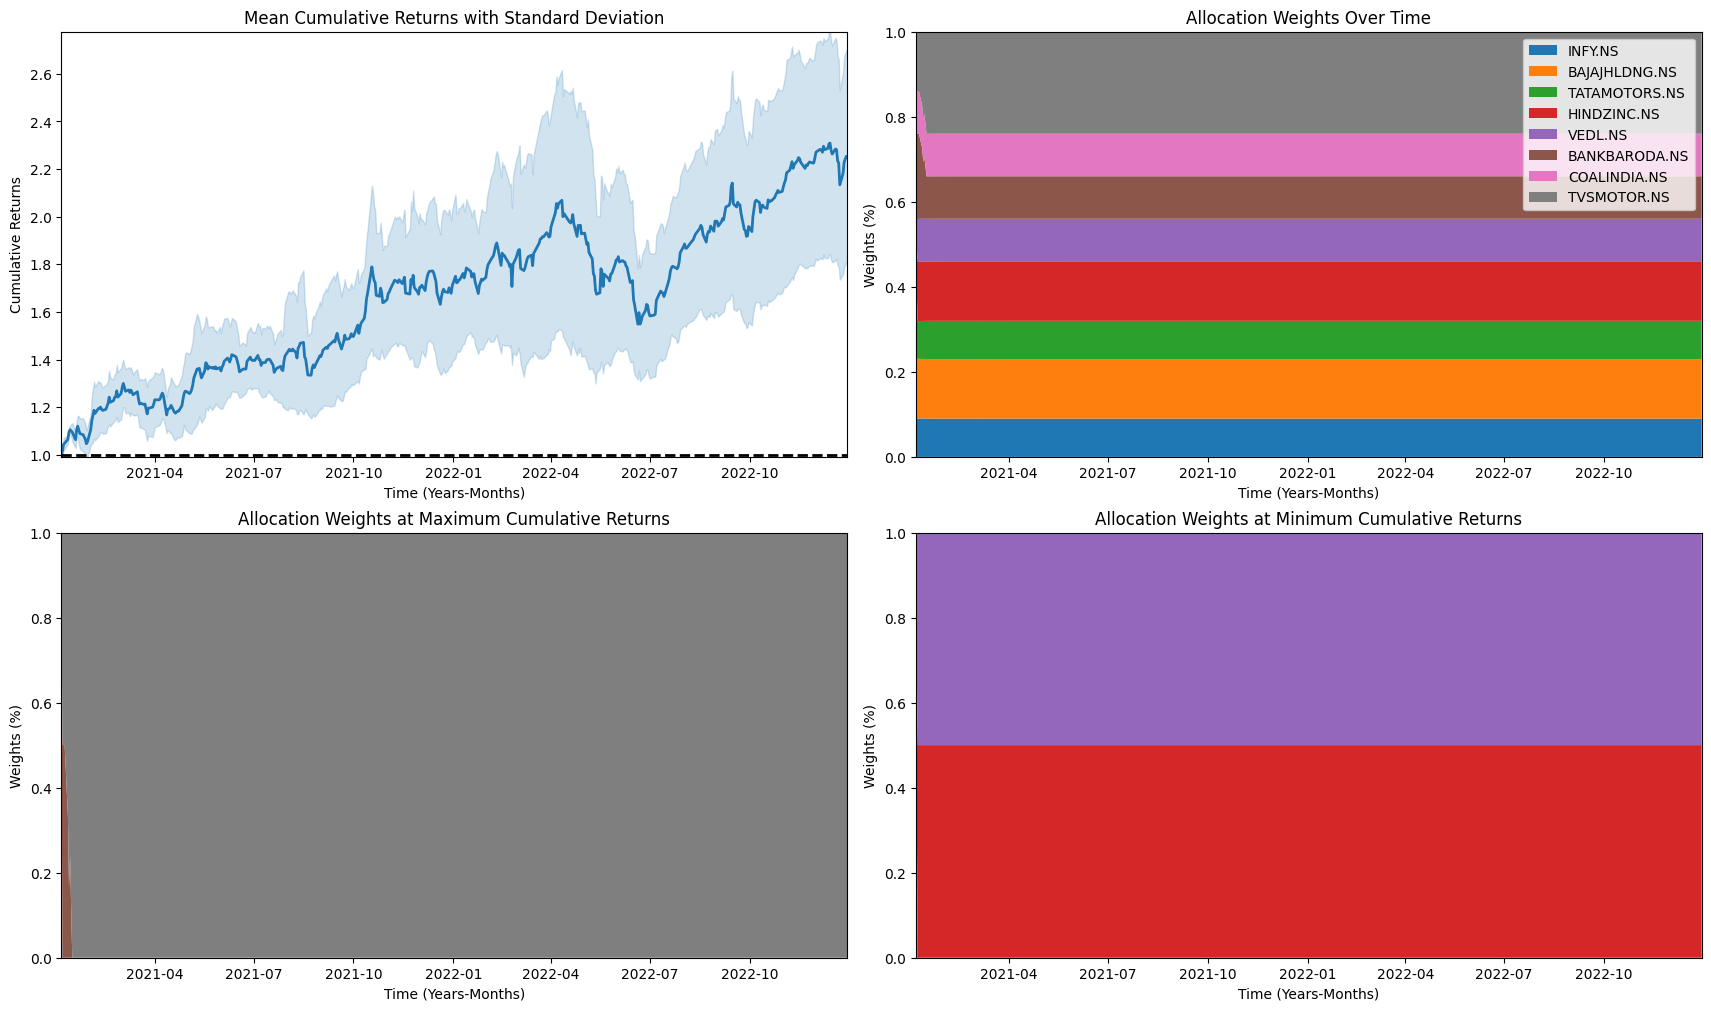

In [65]:
fig, axs = plt.subplots(2, 2, figsize=(17,10),constrained_layout=True)

td3_mean = np.mean(np.array(Cumulative_returns_daily_drl_td3),axis=0)
td3_std = np.std(np.array(Cumulative_returns_daily_drl_td3),axis=0)

axs[0,0].plot(test_re_df.index, td3_mean, color='tab:blue', linewidth =2.0)
axs[0,0].fill_between(test_re_df.index, td3_mean - td3_std, td3_mean + td3_std, alpha=0.2, color='tab:blue')
axs[0,0].margins(x=0)
axs[0,0].margins(y=0)
axs[0,0].axhline(1, color='black', linestyle='--', lw=2)
axs[0,0].set_ylabel("Cumulative Returns")
axs[0,0].set_xlabel("Time (Years-Months)")
axs[0,0].set_title("Mean Cumulative Returns with Standard Deviation")

portfolio_weights_td3_ = np.mean(np.array(portfolio_weights_td3),axis=0)
df = pd.DataFrame (portfolio_weights_td3_, index = test_re_df.index, columns = tickers)
axs[0,1].stackplot(test_re_df.index, df['INFY.NS'], df['BAJAJHLDNG.NS'], df['TATAMOTORS.NS'], df['HINDZINC.NS'], df['VEDL.NS'], df['BANKBARODA.NS'], df['COALINDIA.NS'], df['TVSMOTOR.NS'], labels=tickers)
axs[0,1].legend(loc='upper right')
axs[0,1].margins(x=0)
axs[0,1].margins(y=0)
axs[0,1].set_ylabel("Weights (%)")
axs[0,1].set_xlabel("Time (Years-Months)")
axs[0,1].set_title("Allocation Weights Over Time")

portfolio_weights_td3_ = portfolio_weights_td3[np.argmax(Cumulative_returns_daily_drl_td3[:,-1])]
df = pd.DataFrame (portfolio_weights_td3_, index = test_re_df.index, columns = tickers)
axs[1,0].stackplot(test_re_df.index, df['INFY.NS'], df['BAJAJHLDNG.NS'], df['TATAMOTORS.NS'], df['HINDZINC.NS'], df['VEDL.NS'], df['BANKBARODA.NS'], df['COALINDIA.NS'], df['TVSMOTOR.NS'], labels=tickers)
axs[1,0].margins(x=0)
axs[1,0].margins(y=0)
axs[1,0].set_ylabel("Weights (%)")
axs[1,0].set_xlabel("Time (Years-Months)")
axs[1,0].set_title("Allocation Weights at Maximum Cumulative Returns")

portfolio_weights_td3_ = portfolio_weights_td3[np.argmin(Cumulative_returns_daily_drl_td3[:,-1])]
df = pd.DataFrame (portfolio_weights_td3_, index = test_re_df.index, columns = tickers)
axs[1,1].stackplot(test_re_df.index, df['INFY.NS'], df['BAJAJHLDNG.NS'], df['TATAMOTORS.NS'], df['HINDZINC.NS'], df['VEDL.NS'], df['BANKBARODA.NS'], df['COALINDIA.NS'], df['TVSMOTOR.NS'], labels=tickers)
axs[1,1].margins(x=0)
axs[1,1].margins(y=0)
axs[1,1].set_ylabel("Weights (%)")
axs[1,1].set_xlabel("Time (Years-Months)")
axs[1,1].set_title("Allocation Weights at Minimum Cumulative Returns")


plt.savefig(algo+'.png',bbox_inches='tight')

### SAC

In [66]:
algo = "SAC"
Cumulative_returns_daily_drl_sac = np.zeros([runs, length])
portfolio_weights_sac = np.zeros([runs, length, stocks])

i=0
cont=0
while (i<runs):

    train_env = DummyVecEnv([lambda: StockEnvTrade(df = train_re_df)])
    model = train(algo, policy, train_env, timesteps, seed=cont, save=False)

    test_env = DummyVecEnv([lambda: StockEnvTrade(df = test_re_df)])
    test_obs = test_env.reset()

    portfolio_weights_sac[i] = np.array(DRL_prediction(model, test_re_df, test_env, test_obs))

    check = np.sum(portfolio_weights_sac[i])
    cont = cont +1
    if check != length:
        continue

    return_stocks = test_re_df.pct_change()
    return_stocks_sac = np.sum(return_stocks.multiply(portfolio_weights_sac[i]),axis=1)
    Cumulative_returns_daily_drl_sac[i] = (1+return_stocks_sac).cumprod()
    i = i+1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


Training time:  0.4217765649159749  minutes
Training time:  0.44227444728215537  minutes
Training time:  0.4149559656778971  minutes
Training time:  0.42268732786178587  minutes
Training time:  0.42158416509628294  minutes
Training time:  0.42513553698857626  minutes


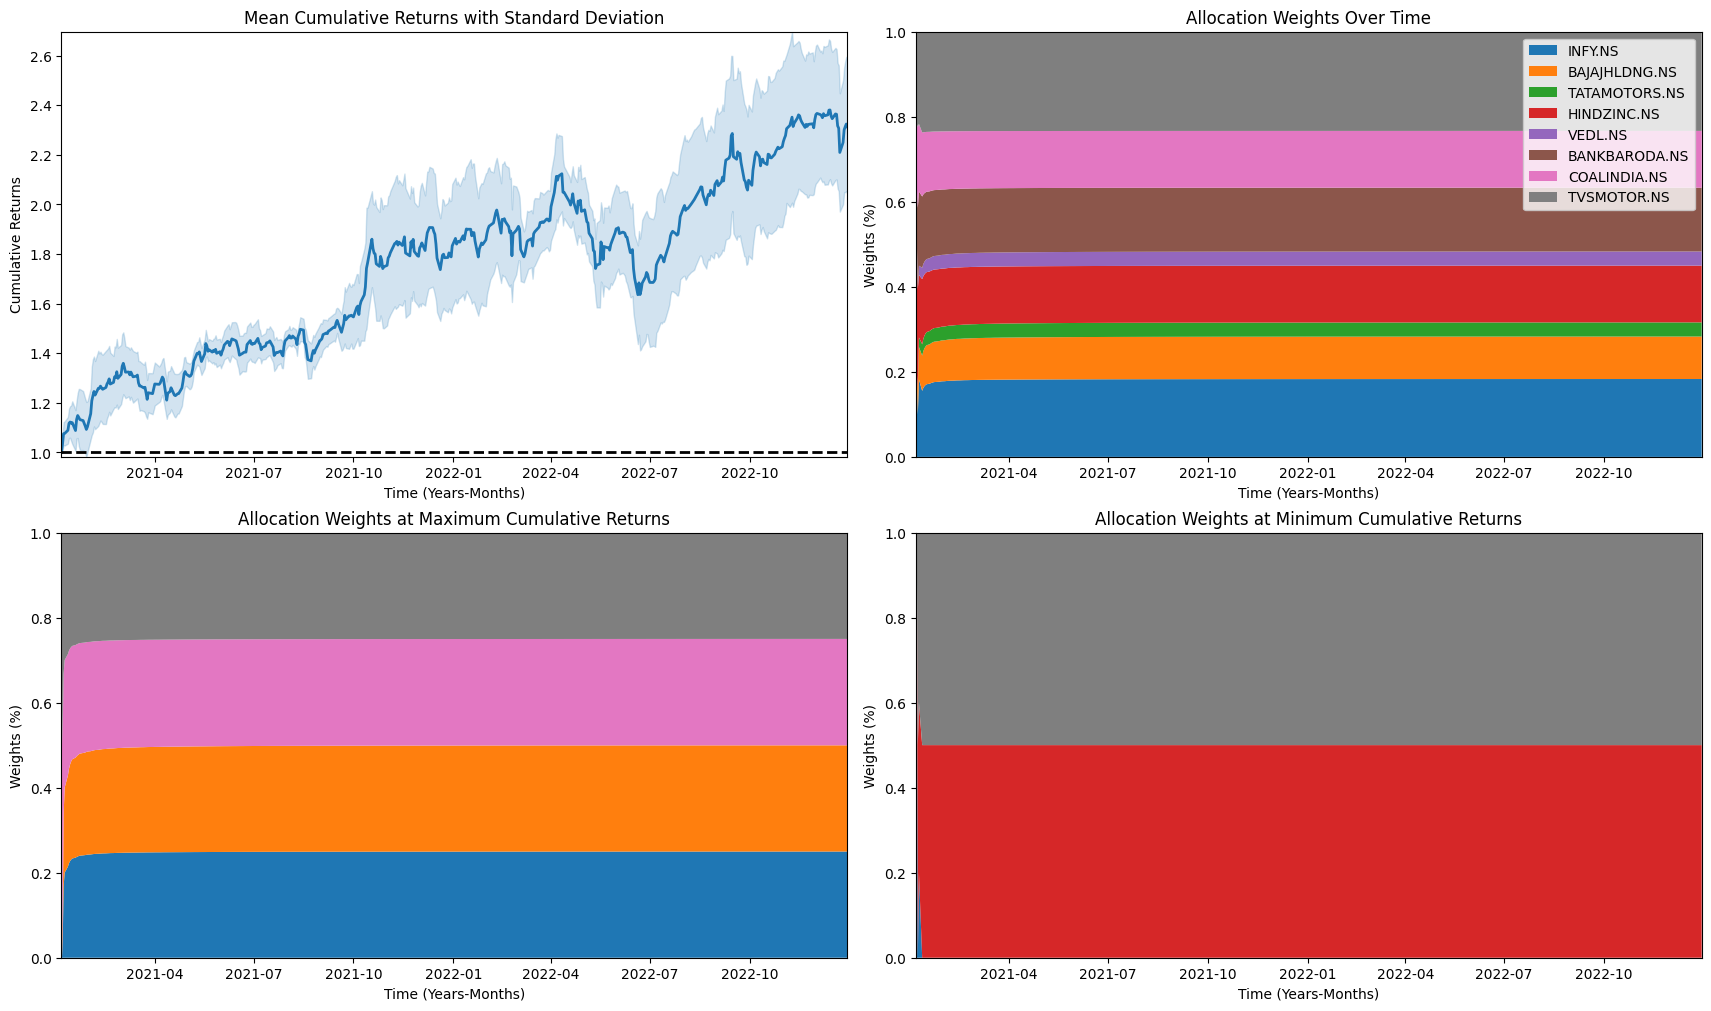

In [67]:
fig, axs = plt.subplots(2, 2, figsize=(17,10),constrained_layout=True)

sac_mean = np.mean(np.array(Cumulative_returns_daily_drl_sac),axis=0)
sac_std = np.std(np.array(Cumulative_returns_daily_drl_sac),axis=0)

axs[0,0].plot(test_re_df.index, sac_mean, color='tab:blue', linewidth =2.0)
axs[0,0].fill_between(test_re_df.index, sac_mean - sac_std, sac_mean + sac_std, alpha=0.2, color='tab:blue')
axs[0,0].margins(x=0)
axs[0,0].margins(y=0)
axs[0,0].axhline(1, color='black', linestyle='--', lw=2)
axs[0,0].set_ylabel("Cumulative Returns")
axs[0,0].set_xlabel("Time (Years-Months)")
axs[0,0].set_title("Mean Cumulative Returns with Standard Deviation")

portfolio_weights_sac_ = np.mean(np.array(portfolio_weights_sac),axis=0)
df = pd.DataFrame (portfolio_weights_sac_, index = test_re_df.index, columns = tickers)
axs[0,1].stackplot(test_re_df.index, df['INFY.NS'], df['BAJAJHLDNG.NS'], df['TATAMOTORS.NS'], df['HINDZINC.NS'], df['VEDL.NS'], df['BANKBARODA.NS'], df['COALINDIA.NS'], df['TVSMOTOR.NS'], labels=tickers)
axs[0,1].legend(loc='upper right')
axs[0,1].margins(x=0)
axs[0,1].margins(y=0)
axs[0,1].set_ylabel("Weights (%)")
axs[0,1].set_xlabel("Time (Years-Months)")
axs[0,1].set_title("Allocation Weights Over Time")

portfolio_weights_sac_ = portfolio_weights_sac[np.argmax(Cumulative_returns_daily_drl_sac[:,-1])]
df = pd.DataFrame (portfolio_weights_sac_, index = test_re_df.index, columns = tickers)
axs[1,0].stackplot(test_re_df.index, df['INFY.NS'], df['BAJAJHLDNG.NS'], df['TATAMOTORS.NS'], df['HINDZINC.NS'], df['VEDL.NS'], df['BANKBARODA.NS'], df['COALINDIA.NS'], df['TVSMOTOR.NS'], labels=tickers)
axs[1,0].margins(x=0)
axs[1,0].margins(y=0)
axs[1,0].set_ylabel("Weights (%)")
axs[1,0].set_xlabel("Time (Years-Months)")
axs[1,0].set_title("Allocation Weights at Maximum Cumulative Returns")

portfolio_weights_sac_ = portfolio_weights_sac[np.argmin(Cumulative_returns_daily_drl_sac[:,-1])]
df = pd.DataFrame (portfolio_weights_sac_, index = test_re_df.index, columns = tickers)
axs[1,1].stackplot(test_re_df.index, df['INFY.NS'], df['BAJAJHLDNG.NS'], df['TATAMOTORS.NS'], df['HINDZINC.NS'], df['VEDL.NS'], df['BANKBARODA.NS'], df['COALINDIA.NS'], df['TVSMOTOR.NS'], labels=tickers)
axs[1,1].margins(x=0)
axs[1,1].margins(y=0)
axs[1,1].set_ylabel("Weights (%)")
axs[1,1].set_xlabel("Time (Years-Months)")
axs[1,1].set_title("Allocation Weights at Minimum Cumulative Returns")

plt.savefig(algo+'.png',bbox_inches='tight')

## A2C

In [68]:
algo = "A2C"
Cumulative_returns_daily_drl_a2c = np.zeros([runs, length])
portfolio_weights_a2c = np.zeros([runs, length, stocks])

i=0
cont=0
while (i<runs):

    train_env = DummyVecEnv([lambda: StockEnvTrade(df = train_re_df)])
    model = train(algo, policy, train_env, timesteps, seed=cont, save=False)

    test_env = DummyVecEnv([lambda: StockEnvTrade(df = test_re_df)])
    test_obs = test_env.reset()

    portfolio_weights_a2c[i] = np.array(DRL_prediction(model, test_re_df, test_env, test_obs))

    check = np.sum(portfolio_weights_a2c[i])
    cont = cont +1
    if check != length:
        continue

    return_stocks = test_re_df.pct_change()
    return_stocks_a2c = np.sum(return_stocks.multiply(portfolio_weights_a2c[i]),axis=1)
    Cumulative_returns_daily_drl_a2c[i] = (1+return_stocks_a2c).cumprod()
    i = i+1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


Training time:  0.032324608167012533  minutes
Training time:  0.042138818899790445  minutes
Training time:  0.02974359194437663  minutes
Training time:  0.029776708285013834  minutes
Training time:  0.0294839342435201  minutes


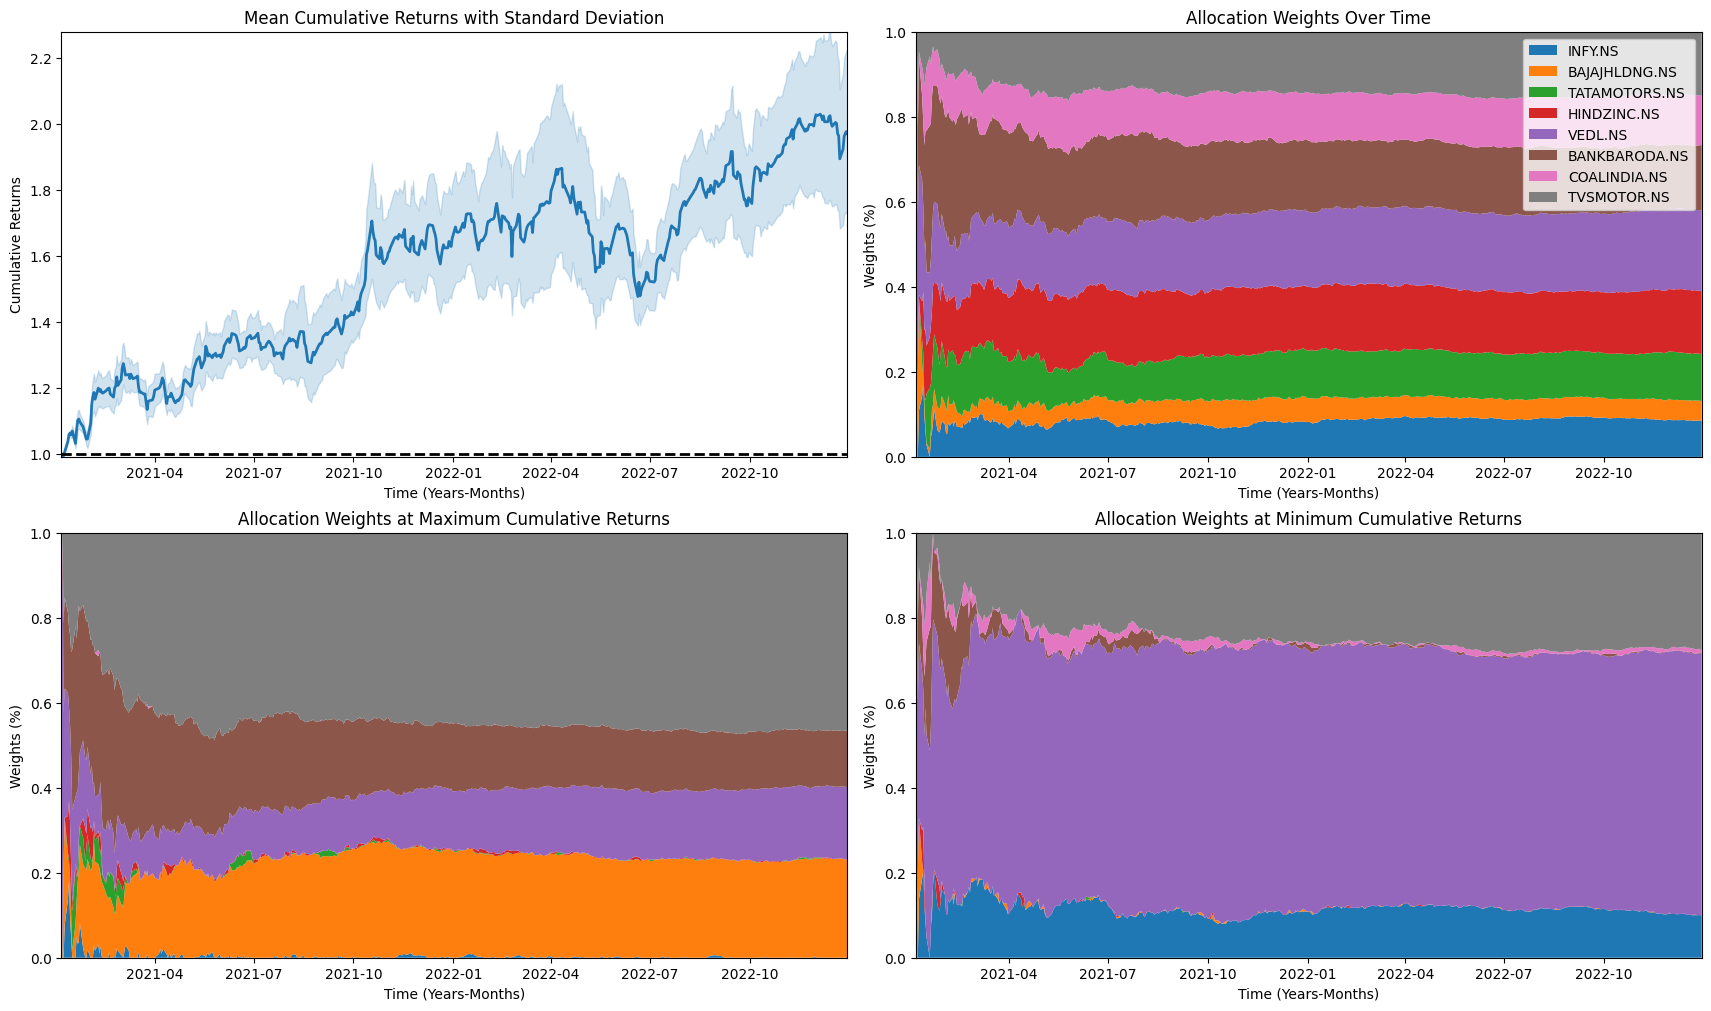

In [69]:
fig, axs = plt.subplots(2, 2, figsize=(17,10),constrained_layout=True)

a2c_mean = np.mean(np.array(Cumulative_returns_daily_drl_a2c),axis=0)
a2c_std = np.std(np.array(Cumulative_returns_daily_drl_a2c),axis=0)

axs[0,0].plot(test_re_df.index, a2c_mean, color='tab:blue', linewidth =2.0)
axs[0,0].fill_between(test_re_df.index, a2c_mean - a2c_std, a2c_mean + a2c_std, alpha=0.2, color='tab:blue')
axs[0,0].margins(x=0)
axs[0,0].margins(y=0)
axs[0,0].axhline(1, color='black', linestyle='--', lw=2)
axs[0,0].set_ylabel("Cumulative Returns")
axs[0,0].set_xlabel("Time (Years-Months)")
axs[0,0].set_title("Mean Cumulative Returns with Standard Deviation")

portfolio_weights_a2c_ = np.mean(np.array(portfolio_weights_a2c),axis=0)
df = pd.DataFrame (portfolio_weights_a2c_, index = test_re_df.index, columns = tickers)
axs[0,1].stackplot(test_re_df.index, df['INFY.NS'], df['BAJAJHLDNG.NS'], df['TATAMOTORS.NS'], df['HINDZINC.NS'], df['VEDL.NS'], df['BANKBARODA.NS'], df['COALINDIA.NS'], df['TVSMOTOR.NS'], labels=tickers)
axs[0,1].legend(loc='upper right')
axs[0,1].margins(x=0)
axs[0,1].margins(y=0)
axs[0,1].set_ylabel("Weights (%)")
axs[0,1].set_xlabel("Time (Years-Months)")
axs[0,1].set_title("Allocation Weights Over Time")

portfolio_weights_a2c_ = portfolio_weights_a2c[np.argmax(Cumulative_returns_daily_drl_a2c[:,-1])]
df = pd.DataFrame (portfolio_weights_a2c_, index = test_re_df.index, columns = tickers)
axs[1,0].stackplot(test_re_df.index, df['INFY.NS'], df['BAJAJHLDNG.NS'], df['TATAMOTORS.NS'], df['HINDZINC.NS'], df['VEDL.NS'], df['BANKBARODA.NS'], df['COALINDIA.NS'], df['TVSMOTOR.NS'], labels=tickers)
axs[1,0].margins(x=0)
axs[1,0].margins(y=0)
axs[1,0].set_ylabel("Weights (%)")
axs[1,0].set_xlabel("Time (Years-Months)")
axs[1,0].set_title("Allocation Weights at Maximum Cumulative Returns")

portfolio_weights_a2c_ = portfolio_weights_a2c[np.argmin(Cumulative_returns_daily_drl_a2c[:,-1])]
df = pd.DataFrame (portfolio_weights_a2c_, index = test_re_df.index, columns = tickers)
axs[1,1].stackplot(test_re_df.index, df['INFY.NS'], df['BAJAJHLDNG.NS'], df['TATAMOTORS.NS'], df['HINDZINC.NS'], df['VEDL.NS'], df['BANKBARODA.NS'], df['COALINDIA.NS'], df['TVSMOTOR.NS'], labels=tickers)
axs[1,1].margins(x=0)
axs[1,1].margins(y=0)
axs[1,1].set_ylabel("Weights (%)")
axs[1,1].set_xlabel("Time (Years-Months)")
axs[1,1].set_title("Allocation Weights at Minimum Cumulative Returns")

plt.savefig(algo+'.png',bbox_inches='tight')

# Traditional Methods

In [70]:
!pip install PyPortfolioOpt

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [71]:
!pip install riskfolio-lib

In [72]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models, expected_returns, objective_functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import riskfolio as rp

In [73]:
window = 50
start = len(train_re_df)-window
data = re_df.iloc[start:]
data = data.reset_index(drop=True)

### Tangency Portfolio

In [74]:
portfolio_weights_min_var = np.zeros([test_re_df.shape[0], len(tickers)])

idx=0
for i in range(portfolio_weights_min_var.shape[0]):
    sel = data.iloc[i:window+i]

    mu = expected_returns.mean_historical_return(sel)
    S = risk_models.sample_cov(sel)

    # optimize for max sharpe ratio
    ef = EfficientFrontier(mu, S)

    try:
        weights = ef.max_sharpe()
    except:
        weights = ef.nonconvex_objective(
            objective_functions.sharpe_ratio,
            objective_args=(ef.expected_returns, ef.cov_matrix),
            weights_sum_to_one=True,
        )

    portfolio_weights_min_var[idx]=np.array([weights[j] for j in tickers])
    idx +=1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 1.0, 'Portfolio Weights')

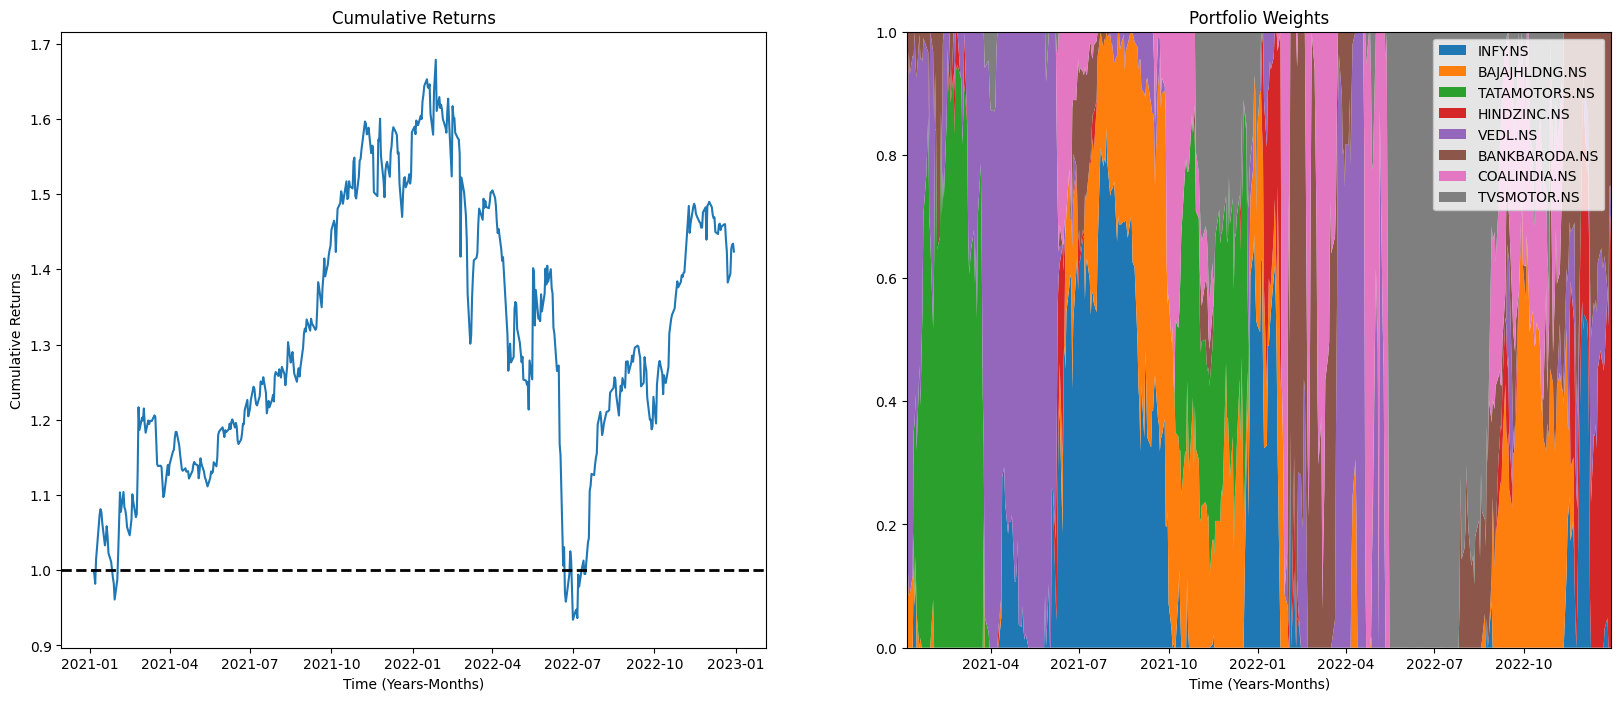

In [75]:
return_stocks = test_re_df.pct_change()
return_stocks_min_var = np.sum(return_stocks.multiply(portfolio_weights_min_var),axis=1)
Cumulative_returns_daily_min_var = (1+return_stocks_min_var).cumprod()

fig, axs = plt.subplots(1, 2, figsize=(20, 8))

axs[0].plot(Cumulative_returns_daily_min_var)
axs[0].axhline(1, color='black', linestyle='--', lw=2)
axs[0].set_ylabel("Cumulative Returns")
axs[0].set_xlabel("Time (Years-Months)")
axs[0].set_title("Cumulative Returns")

df = pd.DataFrame (portfolio_weights_min_var, index = test_re_df.index, columns = tickers)
axs[1].stackplot(test_re_df.index, df['INFY.NS'], df['BAJAJHLDNG.NS'], df['TATAMOTORS.NS'], df['HINDZINC.NS'], df['VEDL.NS'], df['BANKBARODA.NS'], df['COALINDIA.NS'], df['TVSMOTOR.NS'], labels=tickers)
axs[1].legend(loc='upper right')
axs[1].margins(x=0)
axs[1].margins(y=0)
axs[1].set_xlabel("Time (Years-Months)")
axs[1].set_title("Portfolio Weights")

### Minimum volatility

In [76]:
portfolio_weights_min_vol = np.zeros([test_re_df.shape[0], len(tickers)])

idx=0
for i in range(portfolio_weights_min_vol.shape[0]):
    sel = data.iloc[i:window+i]

    mu = expected_returns.mean_historical_return(sel)
    S = risk_models.sample_cov(sel)

    # optimize for max sharpe ratio
    ef = EfficientFrontier(mu, S)
    weights = ef.min_volatility()

    portfolio_weights_min_vol[idx]=np.array([weights[j] for j in tickers])
    idx +=1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 1.0, 'Portfolio Weights')

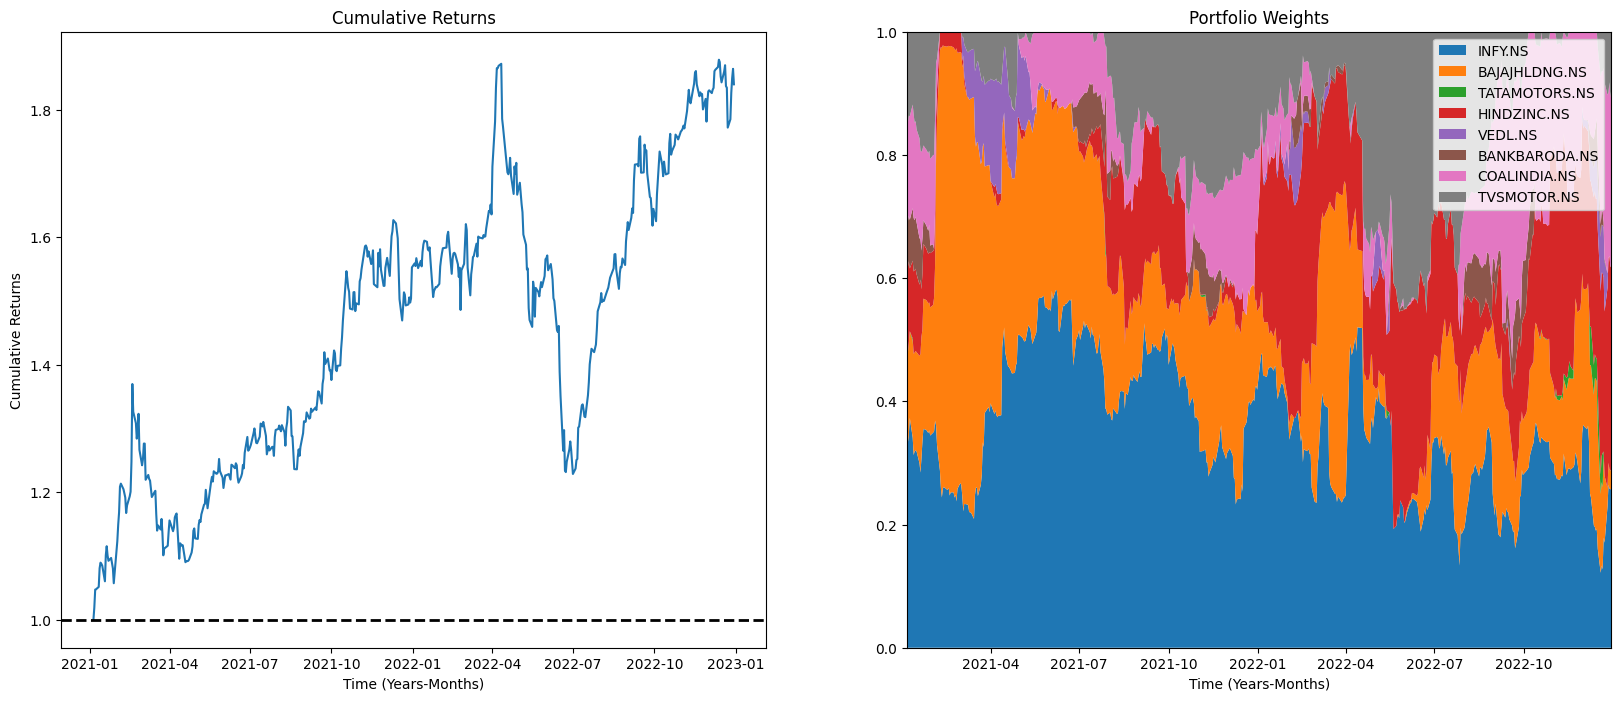

In [77]:
return_stocks_min_vol = np.sum(return_stocks.multiply(portfolio_weights_min_vol),axis=1)
Cumulative_returns_daily_min_vol = (1+return_stocks_min_vol).cumprod()

fig, axs = plt.subplots(1, 2, figsize=(20, 8))

axs[0].plot(Cumulative_returns_daily_min_vol)
axs[0].axhline(1, color='black', linestyle='--', lw=2)
axs[0].set_ylabel("Cumulative Returns")
axs[0].set_xlabel("Time (Years-Months)")
axs[0].set_title('Cumulative Returns')

df = pd.DataFrame (portfolio_weights_min_vol, index = test_re_df.index, columns = tickers)
axs[1].stackplot(test_re_df.index, df['INFY.NS'], df['BAJAJHLDNG.NS'], df['TATAMOTORS.NS'], df['HINDZINC.NS'], df['VEDL.NS'], df['BANKBARODA.NS'], df['COALINDIA.NS'], df['TVSMOTOR.NS'], labels=tickers)
axs[1].legend(loc='upper right')
axs[1].margins(x=0)
axs[1].margins(y=0)
axs[1].set_xlabel("Time (Years-Months)")
axs[1].set_title('Portfolio Weights')

### Risk Parity

In [78]:
portfolio_weights_risk = np.zeros([test_re_df.shape[0], len(tickers)])

idx=0
for i in range(portfolio_weights_risk.shape[0]):
    sel = data.iloc[i:window+i]

    # Building the portfolio object
    port = rp.Portfolio(returns=sel)

    # Calculating optimal portfolio
    # Select method and estimate input parameters:
    method_mu='hist' # Method to estimate expected returns based on historical data.
    method_cov='hist' # Method to estimate covariance matrix based on historical data.

    port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

    model='Classic' # Could be Classic (historical) or FM (Factor Model)
    rm = 'MV' # Risk measure used, this time will be variance
    hist = True # Use historical scenarios for risk measures that depend on scenarios
    rf = 0 # Risk free rate
    b = None # Risk contribution constraints vector
    weights = port.rp_optimization(model=model, rm=rm, rf=rf, b=b, hist=hist)

    portfolio_weights_risk[idx]=np.squeeze(np.array(weights))
    idx +=1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 1.0, 'Portfolio Weights')

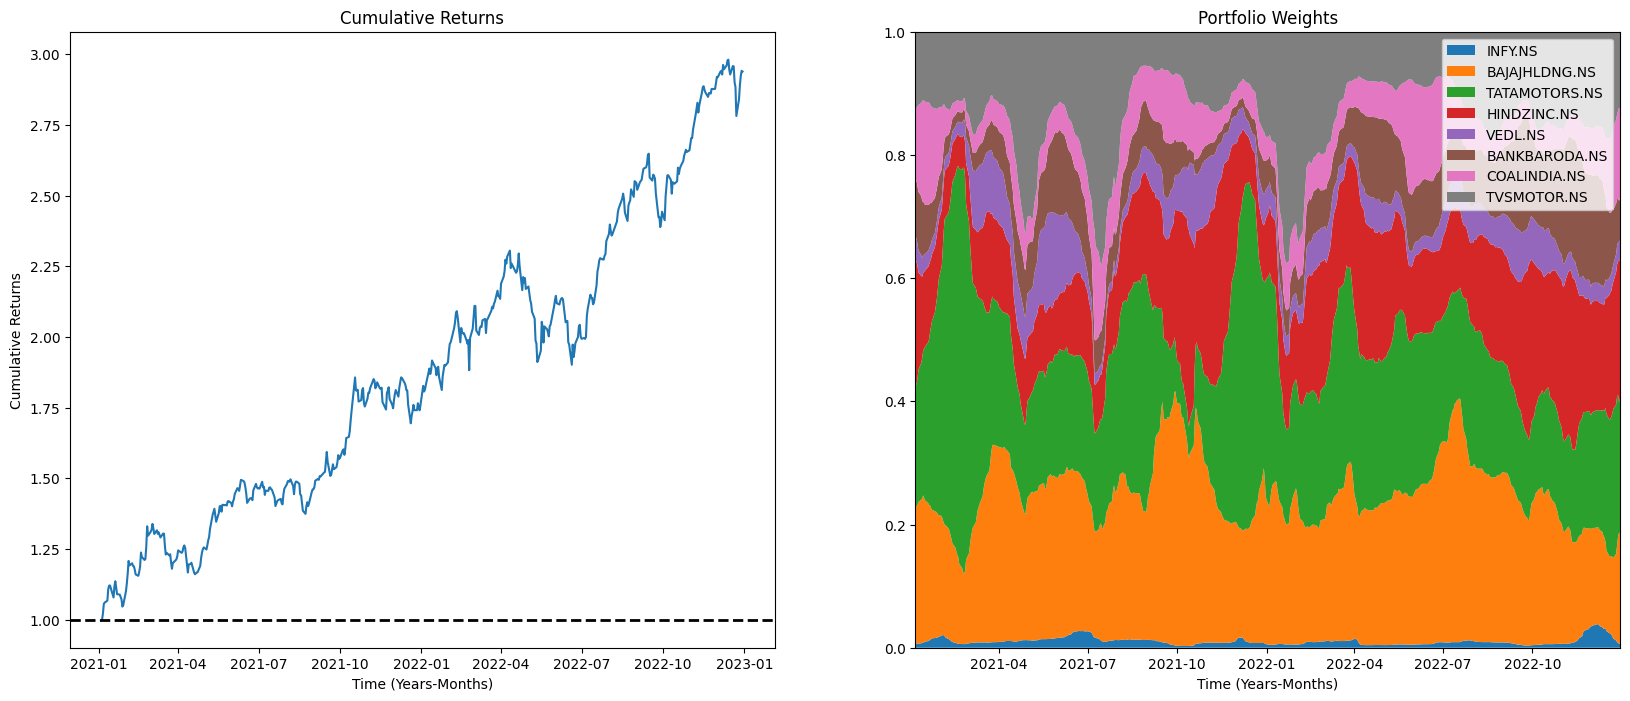

In [79]:
return_stocks = test_re_df.pct_change()
return_stocks_risk = np.sum(return_stocks.multiply(portfolio_weights_risk),axis=1)
Cumulative_returns_daily_risk = (1+return_stocks_risk).cumprod()

fig, axs = plt.subplots(1, 2, figsize=(20, 8))

axs[0].plot(Cumulative_returns_daily_risk)
axs[0].axhline(1, color='black', linestyle='--', lw=2)
axs[0].set_ylabel("Cumulative Returns")
axs[0].set_xlabel("Time (Years-Months)")
axs[0].set_title('Cumulative Returns')

df = pd.DataFrame (portfolio_weights_risk, index = test_re_df.index, columns = tickers)
axs[1].stackplot(test_re_df.index, df['INFY.NS'], df['BAJAJHLDNG.NS'], df['TATAMOTORS.NS'], df['HINDZINC.NS'], df['VEDL.NS'], df['BANKBARODA.NS'], df['COALINDIA.NS'], df['TVSMOTOR.NS'], labels=tickers)
axs[1].legend(loc='upper right')
axs[1].margins(x=0)
axs[1].margins(y=0)
axs[1].set_xlabel("Time (Years-Months)")
axs[1].set_title('Portfolio Weights')

### Equal weighting

In [80]:
portfolio_weights_equal = np.ones([test_re_df.shape[0],test_re_df.shape[1]])/test_re_df.shape[1]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 1.0, 'Portfolio Weights')

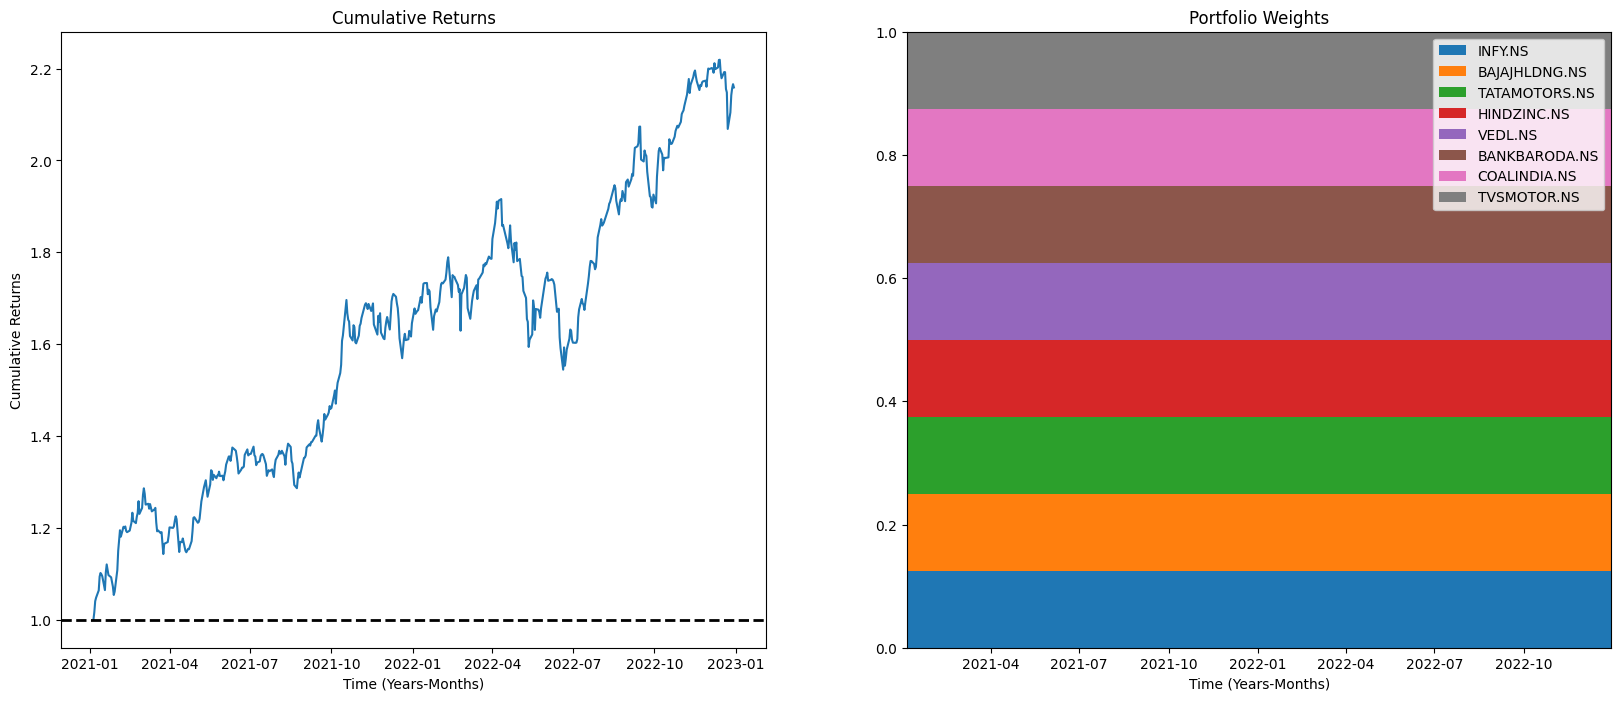

In [81]:
import matplotlib.pyplot as plt

return_stocks = test_re_df.pct_change()
return_stocks_equal = np.sum(return_stocks.multiply(portfolio_weights_equal),axis=1)
Cumulative_returns_daily_equal = (1+return_stocks_equal).cumprod()

fig, axs = plt.subplots(1, 2, figsize=(20, 8))

axs[0].plot(Cumulative_returns_daily_equal)
axs[0].axhline(1, color='black', linestyle='--', lw=2)
axs[0].set_ylabel("Cumulative Returns")
axs[0].set_xlabel("Time (Years-Months)")
axs[0].set_title('Cumulative Returns')

df = pd.DataFrame(portfolio_weights_equal, index=test_re_df.index, columns=tickers)
axs[1].stackplot(test_re_df.index, df['INFY.NS'], df['BAJAJHLDNG.NS'], df['TATAMOTORS.NS'], df['HINDZINC.NS'], df['VEDL.NS'], df['BANKBARODA.NS'], df['COALINDIA.NS'], df['TVSMOTOR.NS'], labels=tickers)
axs[1].legend(loc='upper right')
axs[1].margins(x=0)
axs[1].margins(y=0)
axs[1].set_xlabel("Time (Years-Months)")
axs[1].set_title('Portfolio Weights')

# Comparing All strategies

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


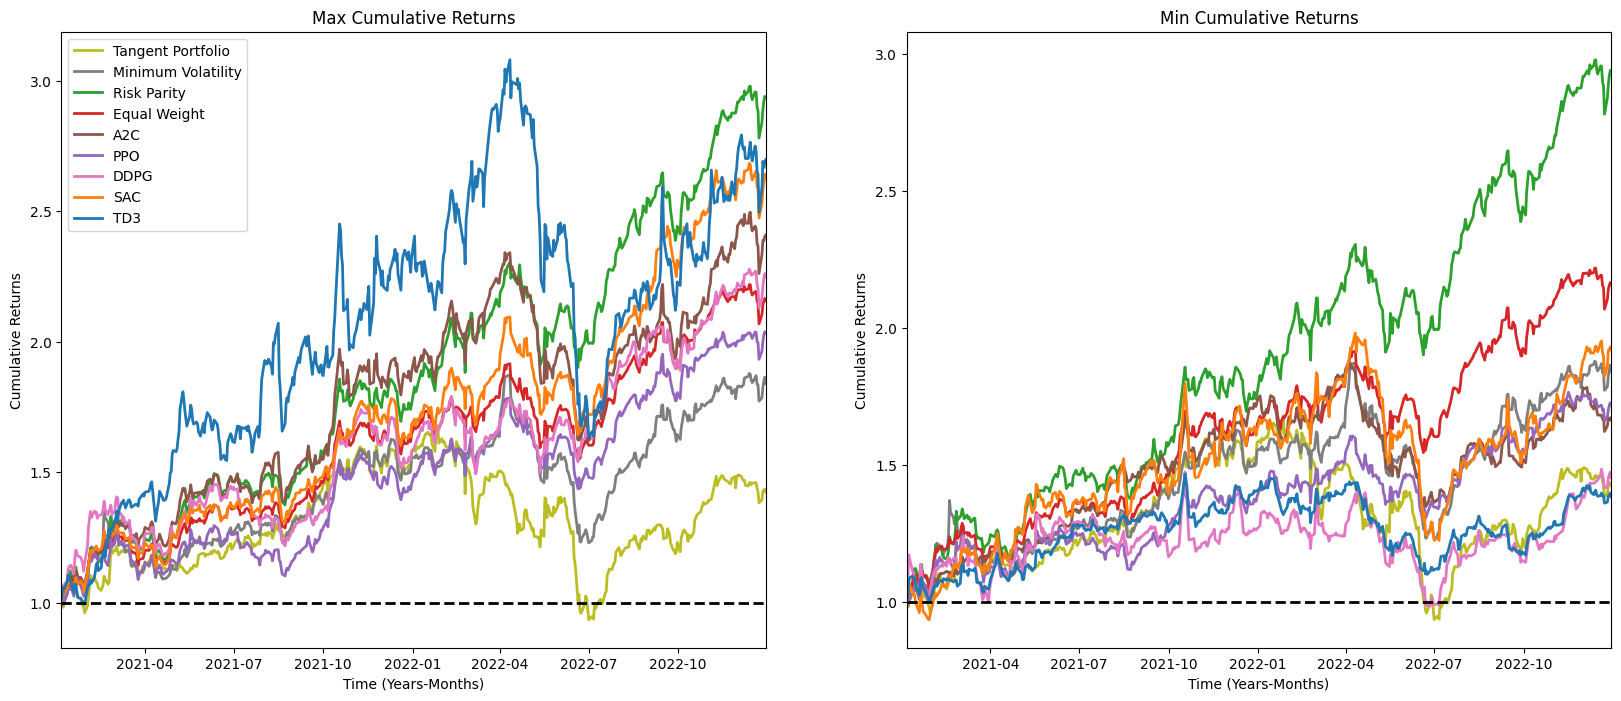

In [82]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

x = Cumulative_returns_daily_equal.index.values

axs[0].plot(x, Cumulative_returns_daily_min_var, color='tab:olive', label="Tangent Portfolio", linewidth =2.0)
axs[0].plot(x, Cumulative_returns_daily_min_vol, color='tab:gray', label="Minimum Volatility", linewidth =2.0)
axs[0].plot(x, Cumulative_returns_daily_risk, color='tab:green', label="Risk Parity", linewidth =2.0)
axs[0].plot(x, Cumulative_returns_daily_equal, color='tab:red', label="Equal Weight", linewidth =2.0)

a2c = Cumulative_returns_daily_drl_a2c[np.argmax(Cumulative_returns_daily_drl_a2c[:,-1])]
axs[0].plot(x, a2c, color='tab:brown', label='A2C', linewidth =2.0)
ppo = Cumulative_returns_daily_drl_ppo[np.argmax(Cumulative_returns_daily_drl_ppo[:,-1])]
axs[0].plot(x, ppo, color='tab:purple', label='PPO', linewidth =2.0)
ddpg = Cumulative_returns_daily_drl_ddpg[np.argmax(Cumulative_returns_daily_drl_ddpg[:,-1])]
axs[0].plot(x, ddpg, color='tab:pink', label='DDPG', linewidth =2.0)
sac = Cumulative_returns_daily_drl_sac[np.argmax(Cumulative_returns_daily_drl_sac[:,-1])]
axs[0].plot(x, sac, color='tab:orange', label='SAC', linewidth =2.0)
td3 = Cumulative_returns_daily_drl_td3[np.argmax(Cumulative_returns_daily_drl_td3[:,-1])]
axs[0].plot(x, td3, color='tab:blue', label='TD3', linewidth =2.0)

axs[0].axhline(1, color='black', linestyle='--', linewidth =2.0)
axs[0].margins(x=0)
axs[0].set_title('Max Cumulative Returns')
axs[0].set_ylabel("Cumulative Returns")
axs[0].set_xlabel("Time (Years-Months)")
axs[0].legend()
plt.savefig(str(rebalance_period)+'_cumulative_returns_max.png',bbox_inches='tight')


axs[1].plot(x, Cumulative_returns_daily_min_var, color='tab:olive', label="Tangent Portfolio", linewidth =2.0)
axs[1].plot(x, Cumulative_returns_daily_min_vol, color='tab:gray', label="Minimum Volatility", linewidth =2.0)
axs[1].plot(x, Cumulative_returns_daily_risk, color='tab:green', label="Risk Parity", linewidth =2.0)
axs[1].plot(x, Cumulative_returns_daily_equal, color='tab:red', label="Equal Weight", linewidth =2.0)

a2c = Cumulative_returns_daily_drl_a2c[np.argmin(Cumulative_returns_daily_drl_a2c[:,-1])]
axs[1].plot(x, a2c, color='tab:brown', label='A2C', linewidth =2.0)
ppo = Cumulative_returns_daily_drl_ppo[np.argmin(Cumulative_returns_daily_drl_ppo[:,-1])]
axs[1].plot(x, ppo, color='tab:purple', label='PPO', linewidth =2.0)
ddpg = Cumulative_returns_daily_drl_ddpg[np.argmin(Cumulative_returns_daily_drl_ddpg[:,-1])]
axs[1].plot(x, ddpg, color='tab:pink', label='DDPG', linewidth =2.0)
sac = Cumulative_returns_daily_drl_sac[np.argmin(Cumulative_returns_daily_drl_sac[:,-1])]
axs[1].plot(x, sac, color='tab:orange', label='SAC', linewidth =2.0)
td3 = Cumulative_returns_daily_drl_td3[np.argmin(Cumulative_returns_daily_drl_td3[:,-1])]
axs[1].plot(x, td3, color='tab:blue', label='TD3', linewidth =2.0)

axs[1].axhline(1, color='black', linestyle='--', linewidth =2.0)
axs[1].margins(x=0)
axs[1].set_title('Min Cumulative Returns')
axs[1].set_ylabel("Cumulative Returns")
axs[1].set_xlabel("Time (Years-Months)")
plt.savefig(str(rebalance_period)+'_cumulative_returns_min.png',bbox_inches='tight')

plt.savefig('portfolio returns.png', bbox_inches='tight')
plt.show()

## Portfolio Evaluation Statistics

In [83]:
!pip install pyfolio

In [84]:
import pyfolio as pf

In [85]:
# NIFTY 50 index for benchmark comparison
market_ticker = "^NSEI"
market_data = yf.download(market_ticker, start="2018-01-01", end="2020-01-01", progress=False)['Close']
market_returns = market_data.pct_change()

In [86]:
strategies = {
    "Nifty50" : market_returns,
    "PPO": return_stocks_ppo,
    "A2C": return_stocks_a2c,
    "DDPG": return_stocks_ddpg,
    "SAC": return_stocks_sac,
    "TD3": return_stocks_td3,
    "Tangency": return_stocks_min_var,
    "Minimum Volatility": return_stocks_min_vol,
    "Risk Parity": return_stocks_risk,
    "Equal Weighting": return_stocks_equal
}

results_df = pd.DataFrame()

# Calculate and store statistics for each strategy
for key, value in strategies.items():
    stats = pf.timeseries.perf_stats(value)
    results_df[key] = pd.Series(stats)

results_df = results_df.T
results_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()
/usr/local/lib/python3.10/dist-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()
/usr/local/lib/python3.10/dist-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 

,Annual return,Cumulative returns,Annual volatility,Sharpe ratio,Calmar ratio,Stability,Max drawdown,Omega ratio,Sortino ratio,Skew,Kurtosis,Tail ratio,Daily value at risk
Nifty50,0.082560,0.165315,0.134067,0.659707,0.567242,0.506674,-0.145547,1.115870,0.994044,NaN,NaN,0.983790,-0.016540
PPO,0.384419,0.892035,0.233436,1.510921,1.792777,0.897817,-0.214426,1.290373,2.220087,-0.187163,1.028499,0.931285,-0.028011
A2C,0.417923,0.982838,0.218994,1.704714,2.999297,0.921182,-0.139340,1.335332,2.645924,0.074853,1.350614,1.108943,-0.026109
DDPG,0.512339,1.249930,0.271957,1.658105,3.116040,0.867167,-0.164420,1.328272,2.474564,-0.174712,1.943889,1.049337,-0.032474
SAC,0.494741,1.198897,0.218405,1.950227,2.452915,0.914843,-0.201695,1.416142,3.091397,0.520335,4.929291,1.096379,-0.025826
TD3,0.578357,1.446500,0.276884,1.788037,3.183300,0.914062,-0.181685,1.354327,2.686112,-0.175432,1.500054,1.115285,-0.032919
Tangency,0.197454,0.423679,0.322954,0.719902,0.445178,0.120881,-0.443539,1.143847,1.042270,-0.189338,6.970005,1.173907,-0.039766
Minimum Volatility,0.364877,0.840034,0.265610,1.304290,1.061464,0.722765,-0.343748,1.256952,1.920518,0.013189,3.176993,0.898084,-0.032089
Risk Parity,0.733044,1.938614,0.259884,2.247802,4.184404,0.962063,-0.175185,1.465894,3.436337,-0.123359,1.793793,0.975238,-0.030424
Equal Weighting,0.480830,1.158960,0.222139,1.879839,2.479958,0.915639,-0.193886,1.374392,2.752194,-0.365309,1.604218,0.943701,-0.026330
